In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [39]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
data = pd.read_csv(url,usecols=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare'])

In [40]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [41]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [5]:
data.shape

(891, 7)

Since there are null values in the Age variables we will try to find the statistical relations of age with other variables and try to fill the nan

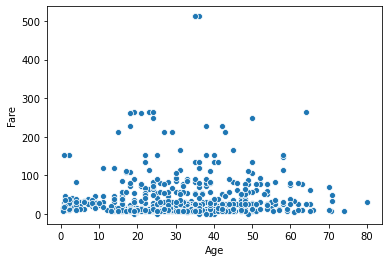

In [6]:
sns.scatterplot(x=data['Age'],y=data['Fare'])

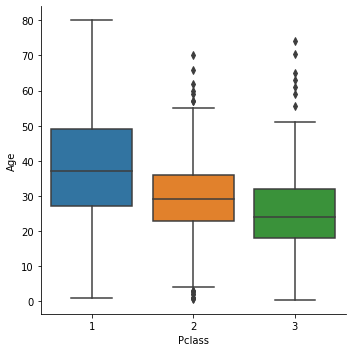

In [10]:
sns.catplot(x='Pclass',y='Age', data=data,kind='box')

In [42]:
data[(data['Age'].isnull())& (data['Pclass']==3)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,male,NaN,0,0,8.4583
19,1,3,female,NaN,0,0,7.2250
26,0,3,male,NaN,0,0,7.2250
28,1,3,female,NaN,0,0,7.8792
29,0,3,male,NaN,0,0,7.8958
...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292
863,0,3,female,NaN,8,2,69.5500
868,0,3,male,NaN,0,0,9.5000
878,0,3,male,NaN,0,0,7.8958


In [43]:
data[(data['Age'].isnull())& (data['Pclass']==2)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
17,1,2,male,NaN,0,0,13.0000
181,0,2,male,NaN,0,0,15.0500
277,0,2,male,NaN,0,0,0.0000
303,1,2,female,NaN,0,0,12.3500
413,0,2,male,NaN,0,0,0.0000
466,0,2,male,NaN,0,0,0.0000
481,0,2,male,NaN,0,0,0.0000
547,1,2,male,NaN,0,0,13.8625
596,1,2,female,NaN,0,0,33.0000
674,0,2,male,NaN,0,0,0.0000


In [44]:
data[(data['Age'].isnull())& (data['Pclass']==1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
31,1,1,female,NaN,1,0,146.5208
55,1,1,male,NaN,0,0,35.5000
64,0,1,male,NaN,0,0,27.7208
166,1,1,female,NaN,0,1,55.0000
168,0,1,male,NaN,0,0,25.9250
185,0,1,male,NaN,0,0,50.0000
256,1,1,female,NaN,0,0,79.2000
270,0,1,male,NaN,0,0,31.0000
284,0,1,male,NaN,0,0,26.0000
295,0,1,male,NaN,0,0,27.7208


In [12]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
data[data['Pclass']==3].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,491.000000,491.0,355.000000,491.000000,491.000000,491.000000
mean,0.242363,3.0,25.140620,0.615071,0.393075,13.675550
std,0.428949,0.0,12.495398,1.374883,0.888861,11.778142
min,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,0.000000,3.0,18.000000,0.000000,0.000000,7.750000
50%,0.000000,3.0,24.000000,0.000000,0.000000,8.050000
75%,0.000000,3.0,32.000000,1.000000,0.000000,15.500000
max,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


In [20]:
#WE will fill the NaN of Age with 24
data['Age'].fillna(24.0,inplace=True)

In [22]:
data = pd.get_dummies(data=data,drop_first=True)

In [23]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [25]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
pred = clf.predict(X_test)

In [28]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       153
           1       0.74      0.65      0.69       115

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268

[[126  27]
 [ 40  75]]


## Hyperparameter

In [29]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,30,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [30]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [32]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 30),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [33]:
#WE will check best parameters now
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 28, 'min_samples_leaf': 6, 'min_samples_split': 8, 'splitter': 'random'}


In [36]:
clf = DecisionTreeClassifier(criterion ='entropy', max_depth= 28, min_samples_leaf= 6, min_samples_split= 8, splitter= 'random')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_leaf=6,
                       min_samples_split=8, splitter='random')

In [37]:
pred = clf.predict(X_test)

In [38]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

[[135  18]
 [ 41  74]]


there is a improvement in performance